**Detecting Seasonality using Multiple Box Plots:**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings

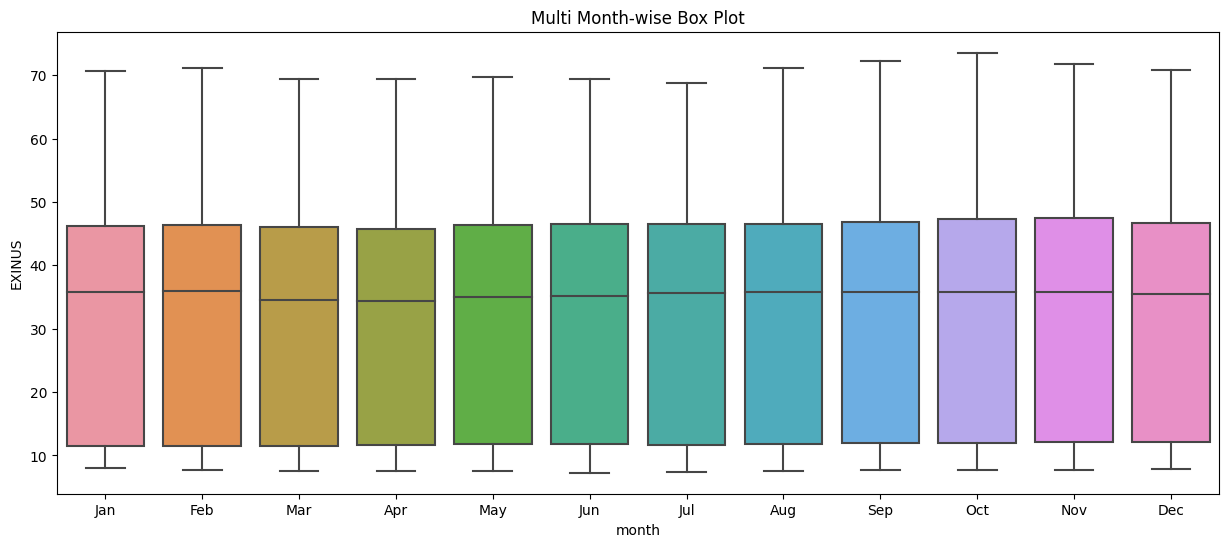

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset.xls',parse_dates=True)
df['month'] = df['observation_date'].dt.strftime('%b')
df['year'] = [d.year for d in df.observation_date]
df['month'] = [d.strftime('%b') for d in df.observation_date]
years = df['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='EXINUS', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

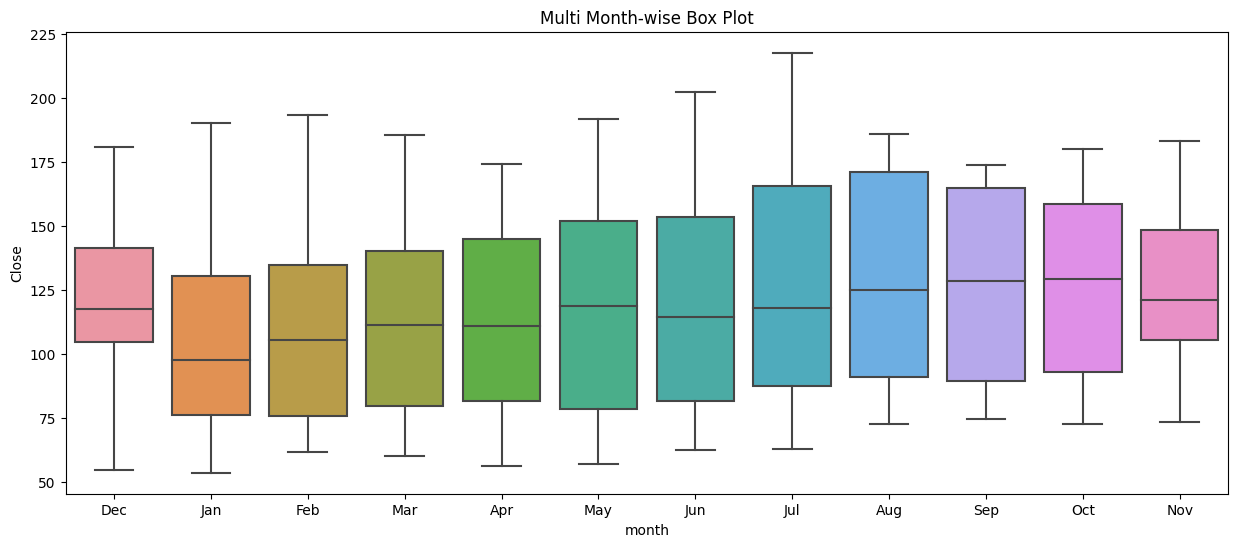

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('/content/FB.csv', parse_dates=['Date'])

df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year

plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='Close', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

**Detecting Seasonality using Autocorrelation Plot**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

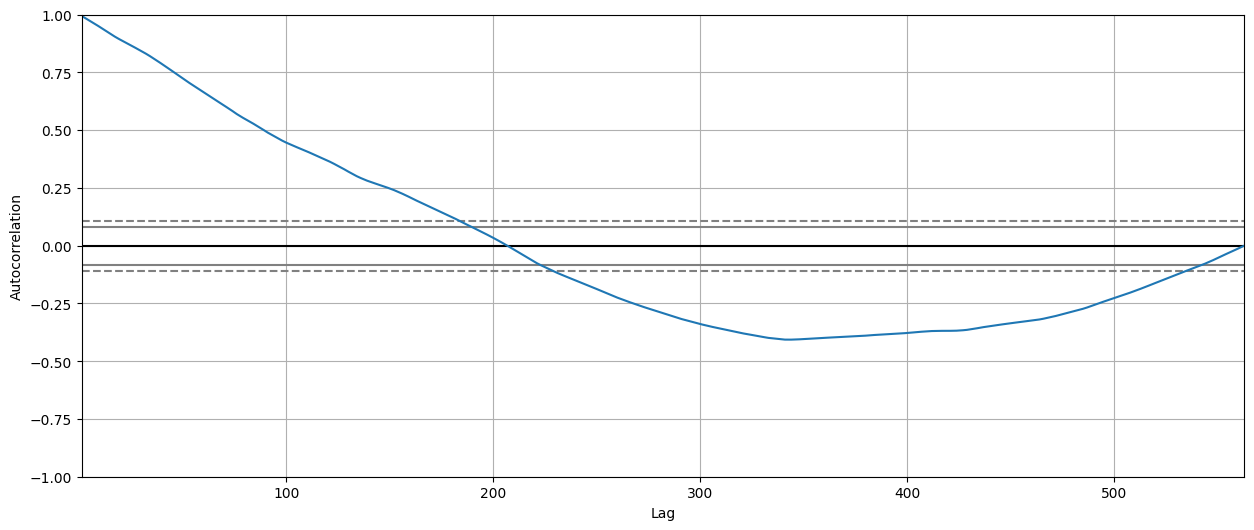

In [7]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset.xls',
index_col=0,parse_dates=True)
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df.EXINUS.tolist())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

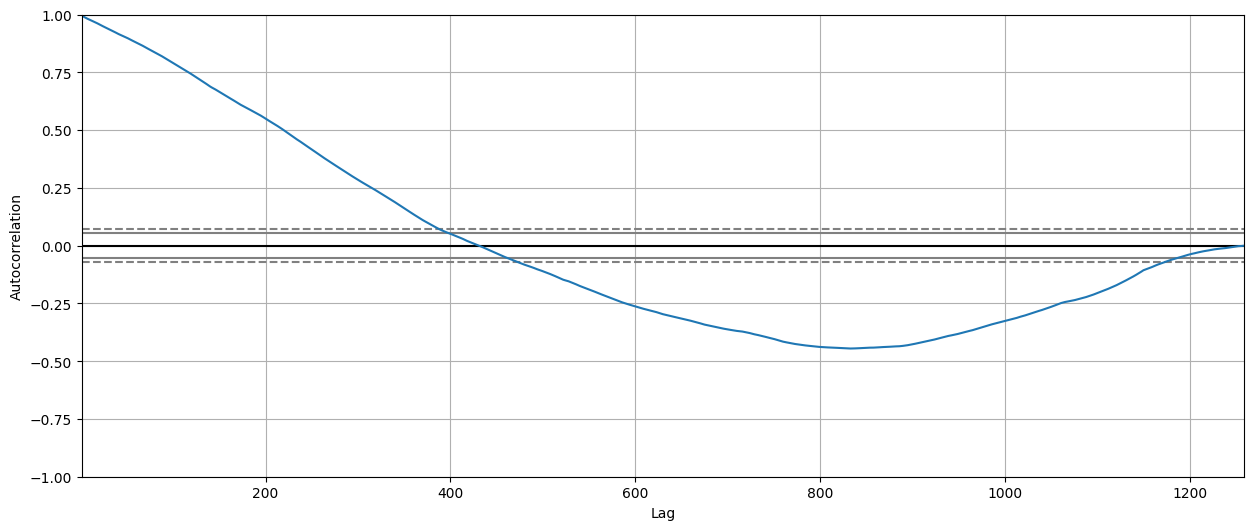

In [8]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'/content/FB.csv',
index_col=0,parse_dates=True)
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df.Close.tolist())

**Seasonal Decomposition using Additive Model**

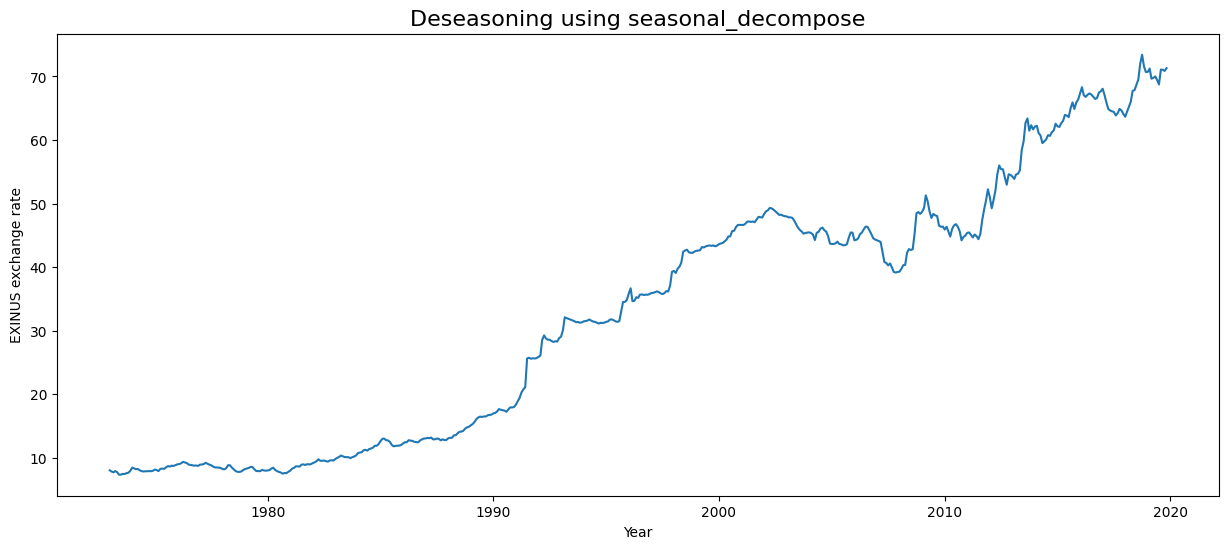

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)
result_mul = seasonal_decompose(df['EXINUS'], model='additive')
deseason = df['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

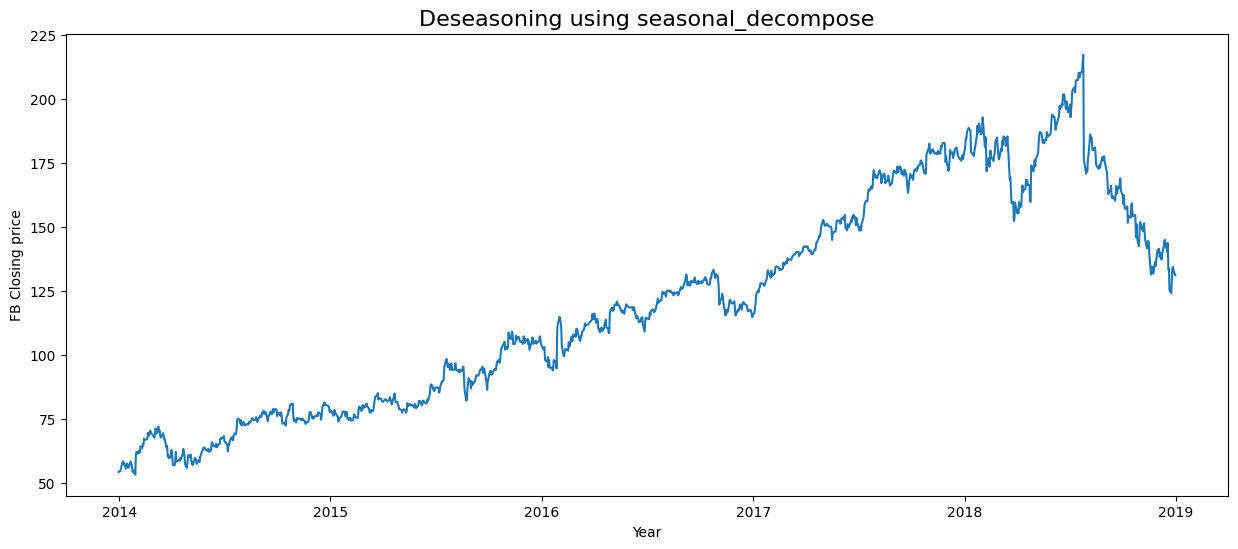

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('/content/FB.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
result_mul = seasonal_decompose(df['Close'], model='additive', period=12)
deseason = df['Close'] - result_mul.seasonal
plt.figure(figsize=(15, 6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('FB Closing price')
plt.show()

**Seasonal Decomposition using multiplicative model**

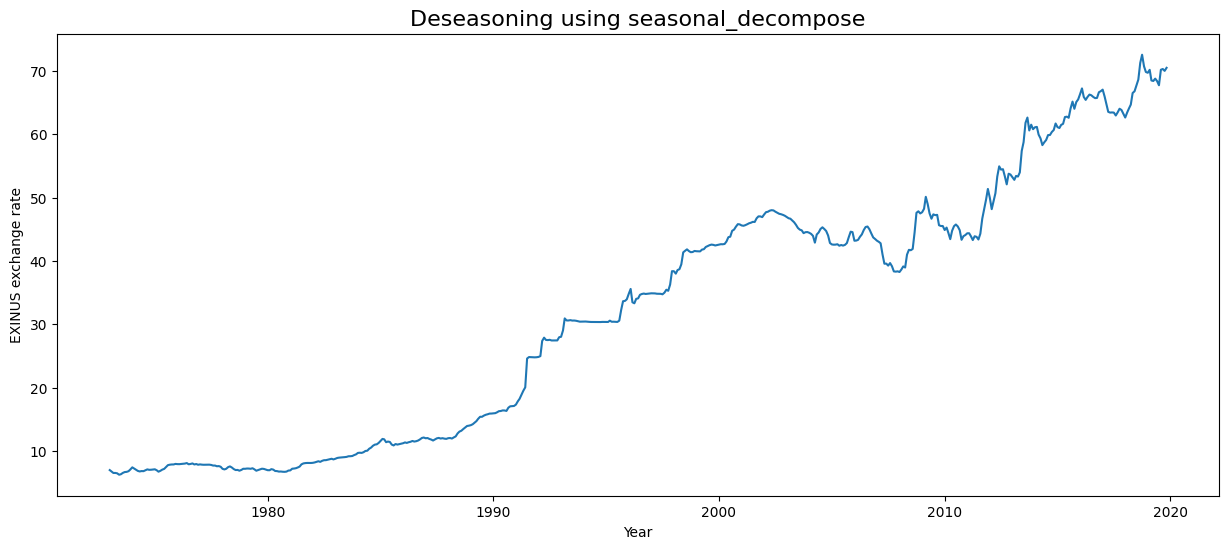

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)
result_mul = seasonal_decompose(df['EXINUS'], model='multiplicative')
deseason = df['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

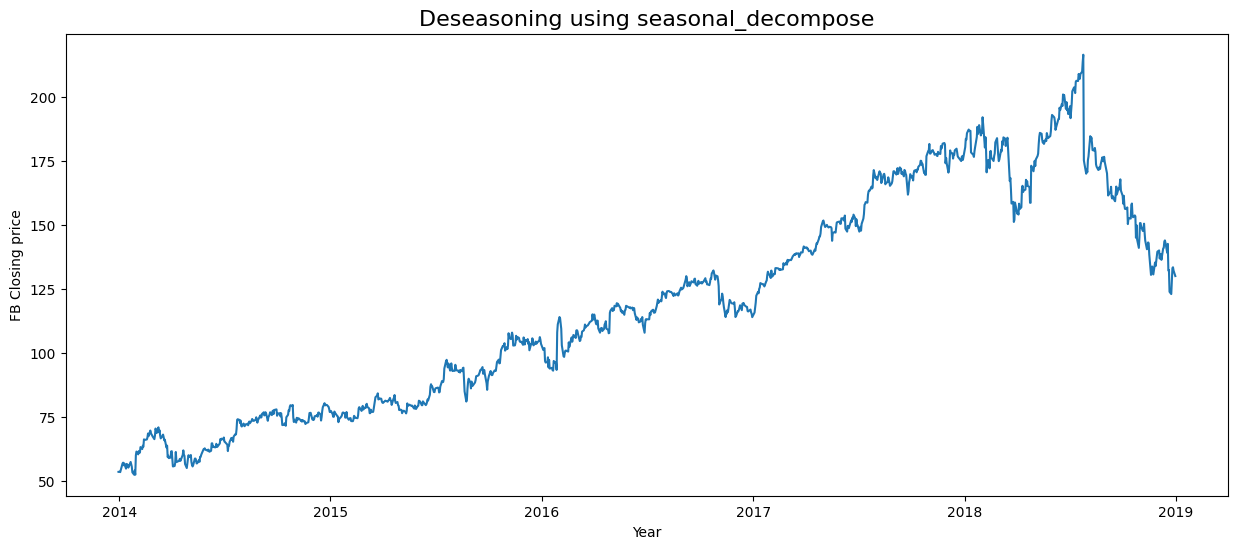

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('/content/FB.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
result_mul = seasonal_decompose(df['Close'], model='multiplicative', period=12)
deseason = df['Close'] - result_mul.seasonal
plt.figure(figsize=(15, 6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('FB Closing price')
plt.show()

**Additive decomposition by scratch**

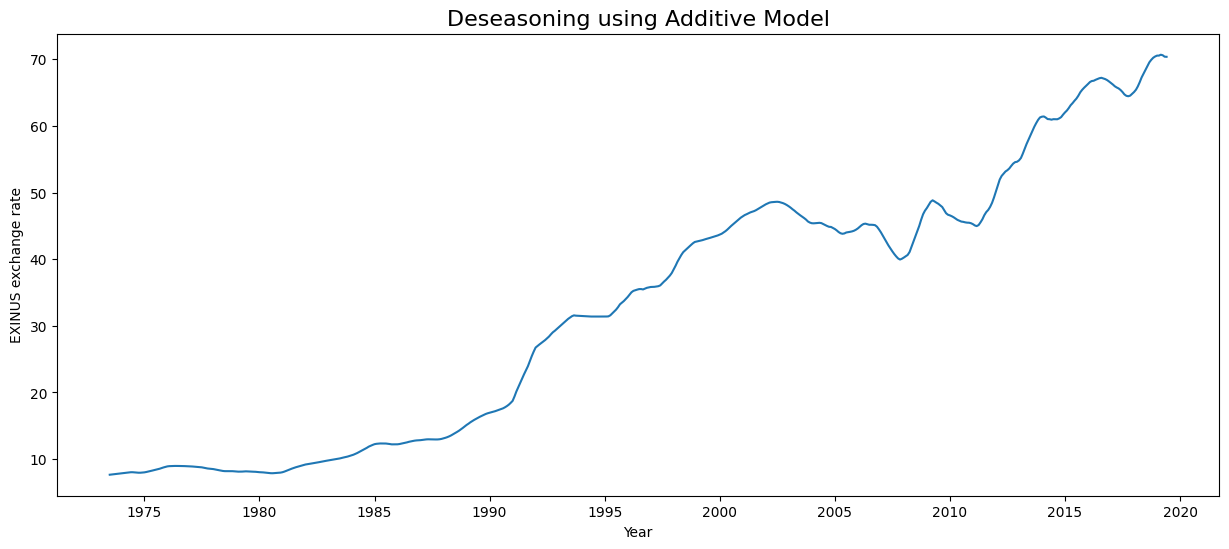

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/India_Exchange_Rate_Dataset.xls', index_col=0, parse_dates=True)

seasonality_period = 12

seasonal = df['EXINUS'].rolling(window=seasonality_period, center=True).mean()

trend = df['EXINUS'] - seasonal

residual = df['EXINUS'] - trend

plt.figure(figsize=(15, 6))
plt.plot(residual)
plt.title('Deseasoning using Additive Model', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

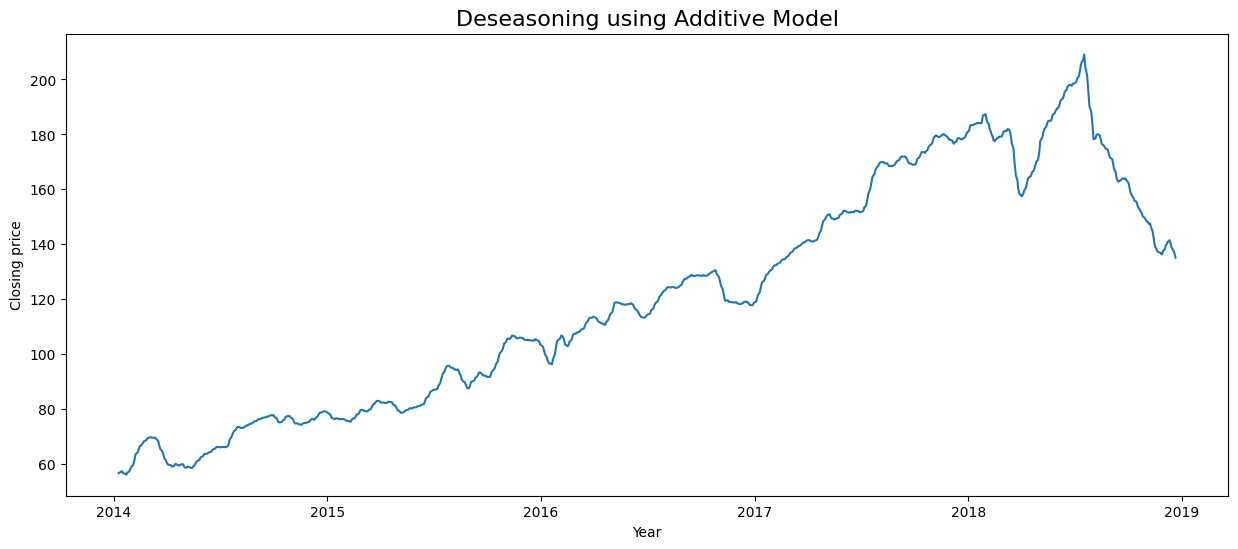

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/FB.csv', index_col=0, parse_dates=True)

seasonality_period = 12

seasonal = df['Close'].rolling(window=seasonality_period, center=True).mean()

trend = df['Close'] - seasonal

residual = df['Close'] - trend

plt.figure(figsize=(15, 6))
plt.plot(residual)
plt.title('Deseasoning using Additive Model', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Closing price')
plt.show()

**Multiplicative decomposition from scratch**

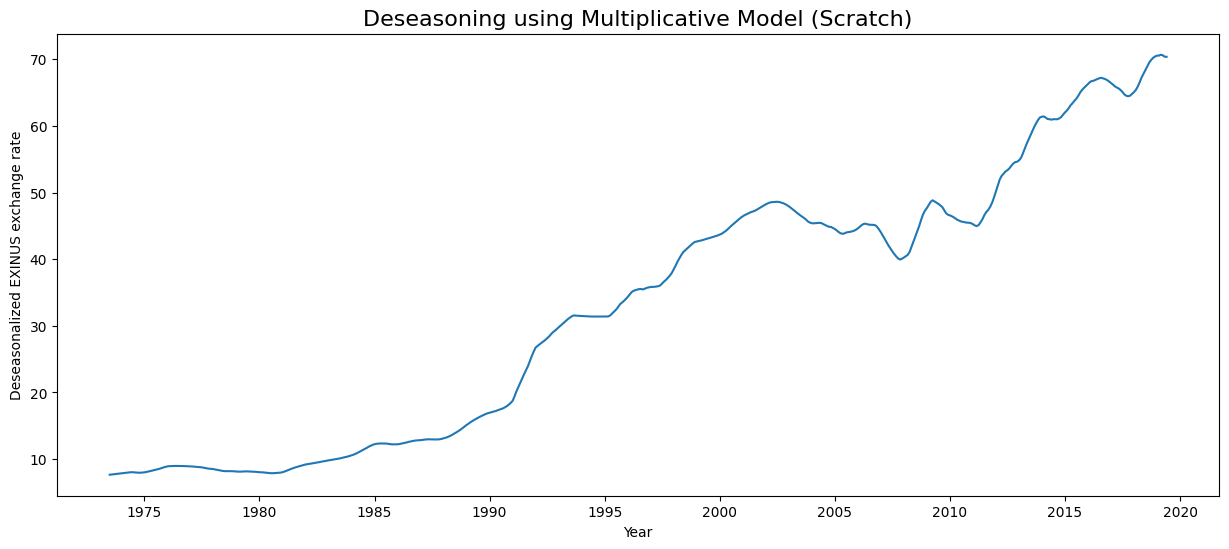

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset.xls', index_col=0, parse_dates=True)

def moving_average(data, window_size):
    return data.rolling(window=window_size, center=True).mean()

window_size = 12

seasonal_component = df['EXINUS'] / moving_average(df['EXINUS'], window_size)

deseason = df['EXINUS'] / seasonal_component

plt.figure(figsize=(15, 6))
plt.plot(deseason)
plt.title('Deseasoning using Multiplicative Model (Scratch)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Deseasonalized EXINUS exchange rate')
plt.show()

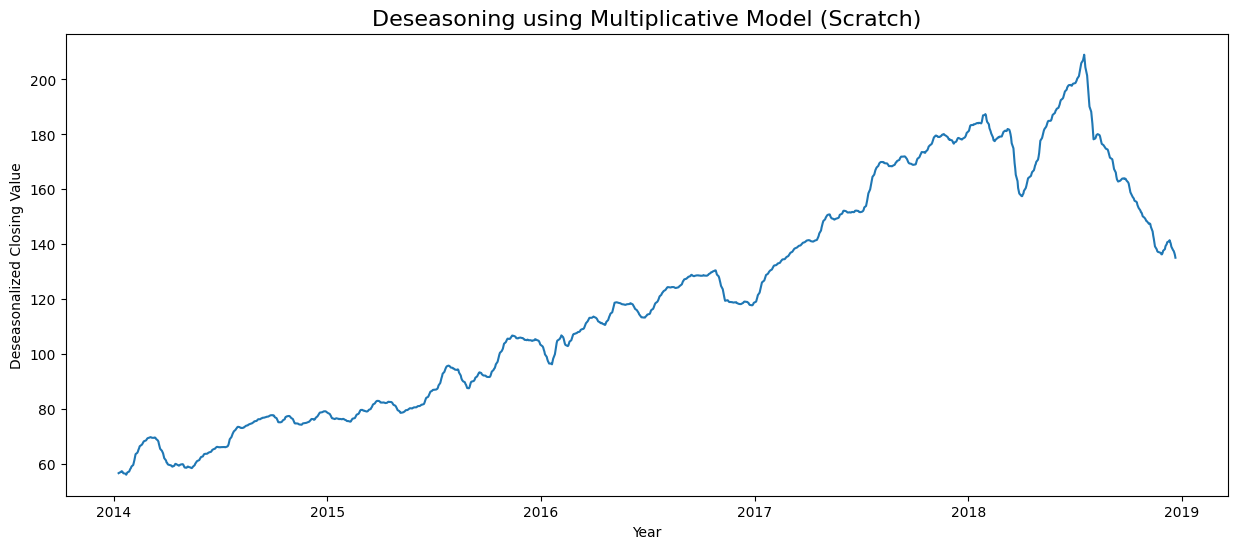

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'/content/FB.csv', index_col=0, parse_dates=True)

def moving_average(data, window_size):
    return data.rolling(window=window_size, center=True).mean()

window_size = 12
seasonal_component = df['Close'] / moving_average(df['Close'], window_size)

deseason = df['Close'] / seasonal_component

plt.figure(figsize=(15, 6))
plt.plot(deseason)
plt.title('Deseasoning using Multiplicative Model (Scratch)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Deseasonalized Closing Value')
plt.show()